# Feature filtering and Basic EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/df_pp_7d_ma_07_07_2025.csv')
print(df.shape)
df.head(4)

(1278, 97)


,event_on,demand_sales_eur,cogs_eur,dgm_eur,number_orders,number_orders_tracked,number_visits,marketing_cost,google_clicks,google_cost_eur,...,sku_with_discount_%,cr_tracked_%,aov_eur,cpc,stock_discount_rate_total_%,stock_discount_rate_discounted_%,dgm_perc,cpr_perc,is_Peak_Driving_Public_Holiday_week,is_Sun_to_Mon_Shift_week
0,2022-01-06,3552998.45,1813212.68,1739785.77,19284.0,14245.0,618134.0,178538.1495,47166.333333,19906.410000,...,0.587190,0.023045,184.245927,0.422047,NaN,NaN,0.489667,0.050250,0.0,0.0
1,2022-01-07,4265219.43,2185871.64,2079347.79,23063.0,17049.0,738846.0,216271.7056,48904.285714,20902.528571,...,0.594692,0.023075,184.937754,0.427417,NaN,NaN,0.487513,0.050706,0.0,0.0
2,2022-01-08,4670554.08,2402072.26,2268481.82,25151.0,18555.0,777932.0,232745.7449,52588.285714,22797.578571,...,0.610103,0.023852,185.700532,0.433511,NaN,NaN,0.485699,0.049833,0.0,0.0
3,2022-01-09,5063633.66,2614689.86,2448943.80,26970.0,19959.0,810923.0,245583.8257,55626.142857,24303.740000,...,0.642023,0.024613,187.750599,0.436912,NaN,NaN,0.483634,0.048500,0.0,0.0


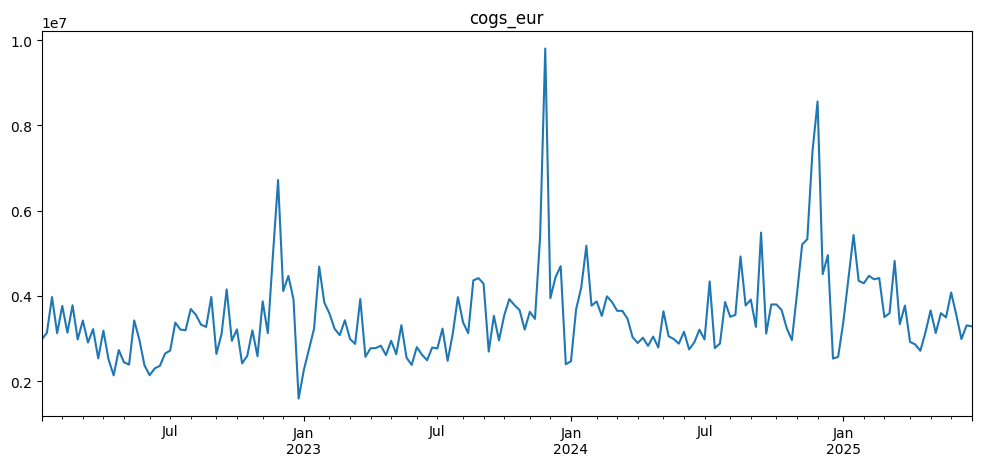

In [25]:
df.plot(kind='line',
        y='cogs_eur',
        title='cogs_eur',
        xlabel='',
        legend=None,
        figsize=(12, 5));

In [4]:
print('Number of columns are', len(df.columns))

Number of columns are 97


In [5]:
df.columns

Index(['event_on', 'demand_sales_eur', 'cogs_eur', 'dgm_eur', 'number_orders',
       'number_orders_tracked', 'number_visits', 'marketing_cost',
       'google_clicks', 'google_cost_eur', 'number_of_skus_with_discount',
       'number_of_skus_with_discount_retail',
       'number_of_skus_with_discount_closeout',
       'number_of_skus_with_discount_own_brand',
       'number_of_skus_with_discount_new', 'number_of_skus_with_discount_old',
       'number_of_skus_with_discount_own_brand_new',
       'number_of_skus_with_discount_own_brand_old',
       'number_of_skus_with_discount_retail_new',
       'number_of_skus_with_discount_retail_old',
       'number_of_skus_with_discount_closeout_new',
       'number_of_skus_with_discount_closeout_old', 'number_of_skus',
       'number_of_skus_retail', 'number_of_skus_closeout',
       'number_of_skus_own_brand', 'number_of_skus_new', 'number_of_skus_old',
       'number_of_skus_closeout_new', 'number_of_skus_closeout_old',
       'number_of_skus

In [6]:
continous_columns_df = df.select_dtypes(include=['number'])
print('Number of columns those have continous variable ', len(continous_columns_df.columns))

Number of columns those have continous variable  96


In [7]:
categorical_columns_df = df.select_dtypes(exclude=['number'])
print('Number of columns those have categorical variable ', len(categorical_columns_df.columns))

Number of columns those have categorical variable  1


In [8]:
categorical_columns_df.columns

Index(['event_on'], dtype='object')

In [9]:
df['event_on'] = pd.to_datetime(df['event_on'])
df['event_on'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1278 entries, 0 to 1277
Series name: event_on
Non-Null Count  Dtype         
--------------  -----         
1278 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 10.1 KB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 97 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   event_on                                                            1278 non-null   datetime64[ns]
 1   demand_sales_eur                                                    1278 non-null   float64       
 2   cogs_eur                                                            1278 non-null   float64       
 3   dgm_eur                                                             1278 non-null   float64       
 4   number_orders                                                       1278 non-null   float64       
 5   number_orders_tracked                                               1278 non-null   float64       
 6   number_visits                                           

In [11]:
# daily -> weekly (first day of the week, 0: Monday)
df = df[df['event_on'].dt.dayofweek == 0]
df.shape

(182, 97)

In [12]:
# set event_on as a index
df.index = df['event_on'].values

## Columns to be considered

In [13]:
target = 'cogs_eur'

# this list was provided by Adam (current features in the causal model)
columns_used_to_train = [
'aov_eur',
'available_stock_value_after_discount_complete_eur',
'avg_temp',
'cpc',
'cr_tracked_%',
'email_recipients',
'email_visits',
'internalWeeks_until_SeasonalSaleStart',
'internal_Week_of_FW_Season',
'internal_Week_of_SS_Season',
'is_Peak_Driving_Public_Holiday_week',
'is_Sun_to_Mon_Shift_week',
'is_black_week_event',
'is_email_campaign_type_deal',
'is_email_campaign_type_liveshop',
'is_email_campaign_type_newsletter',
'is_percentage_on_top',
'is_percentage_on_top_applicable',
'is_season_sale_event',
'is_temp_drop_flag',
'number_days_after_last_event',
'number_days_till_next_event',
'number_orders',
'number_visits',
'sku_with_discount_%',
'stock_discount_rate_total_%',
'target_cpr']

In [14]:
print('Number of columns in main csv', len(df.columns))
print('Number features for train', len(columns_used_to_train))
common_in_both_main_and_train = list(set(df.columns).intersection(set(columns_used_to_train)))
print('Common in both', len(common_in_both_main_and_train))
diff_column_list = list(set(columns_used_to_train).difference(set(df.columns)))
print('Features in train model but not in main csv', len(diff_column_list))

Number of columns in main csv 97
Number features for train 27
Common in both 27
Features in train model but not in main csv 0


In [15]:
print('Number of diff columns', len(diff_column_list))
diff_column_list

Number of diff columns 0


[]

# Creating Training CSV

In [16]:
target = 'cogs_eur'

# this list was provided by Adam (current features in the causal model)
columns_used_to_train = [
'aov_eur',
'available_stock_value_after_discount_complete_eur',
'avg_temp',
'cpc',
'cr_tracked_%',
'email_recipients',
'email_visits',
'internalWeeks_until_SeasonalSaleStart',
'internal_Week_of_FW_Season',
'internal_Week_of_SS_Season',
'is_Peak_Driving_Public_Holiday_week',
'is_Sun_to_Mon_Shift_week',
'is_black_week_event',
'is_email_campaign_type_deal',
'is_email_campaign_type_liveshop',
'is_email_campaign_type_newsletter',
'is_percentage_on_top',
'is_percentage_on_top_applicable',
'is_season_sale_event',
'is_temp_drop_flag',
'number_days_after_last_event',
'number_days_till_next_event',
'number_orders',
'number_visits',
'sku_with_discount_%',
'stock_discount_rate_total_%',
'target_cpr']

In [17]:
columns_used_to_train

['aov_eur',
 'available_stock_value_after_discount_complete_eur',
 'avg_temp',
 'cpc',
 'cr_tracked_%',
 'email_recipients',
 'email_visits',
 'internalWeeks_until_SeasonalSaleStart',
 'internal_Week_of_FW_Season',
 'internal_Week_of_SS_Season',
 'is_Peak_Driving_Public_Holiday_week',
 'is_Sun_to_Mon_Shift_week',
 'is_black_week_event',
 'is_email_campaign_type_deal',
 'is_email_campaign_type_liveshop',
 'is_email_campaign_type_newsletter',
 'is_percentage_on_top',
 'is_percentage_on_top_applicable',
 'is_season_sale_event',
 'is_temp_drop_flag',
 'number_days_after_last_event',
 'number_days_till_next_event',
 'number_orders',
 'number_visits',
 'sku_with_discount_%',
 'stock_discount_rate_total_%',
 'target_cpr']

In [18]:
train_data_df = df[columns_used_to_train]
train_data_df[target] = df[target]

/var/folders/r7/zmlxrmk51wj_bl94p6kmlttw0000gn/T/ipykernel_28649/1384728815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_df[target] = df[target]


In [19]:
(train_data_df.isna().sum() / df.shape[0])*100

aov_eur                                              0.000000
available_stock_value_after_discount_complete_eur    4.945055
avg_temp                                             0.000000
cpc                                                  0.000000
cr_tracked_%                                         0.000000
email_recipients                                     0.000000
email_visits                                         0.000000
internalWeeks_until_SeasonalSaleStart                0.000000
internal_Week_of_FW_Season                           0.000000
internal_Week_of_SS_Season                           0.000000
is_Peak_Driving_Public_Holiday_week                  0.000000
is_Sun_to_Mon_Shift_week                             0.000000
is_black_week_event                                  0.000000
is_email_campaign_type_deal                          0.000000
is_email_campaign_type_liveshop                      0.000000
is_email_campaign_type_newsletter                    0.000000
is_perce

<Axes: >

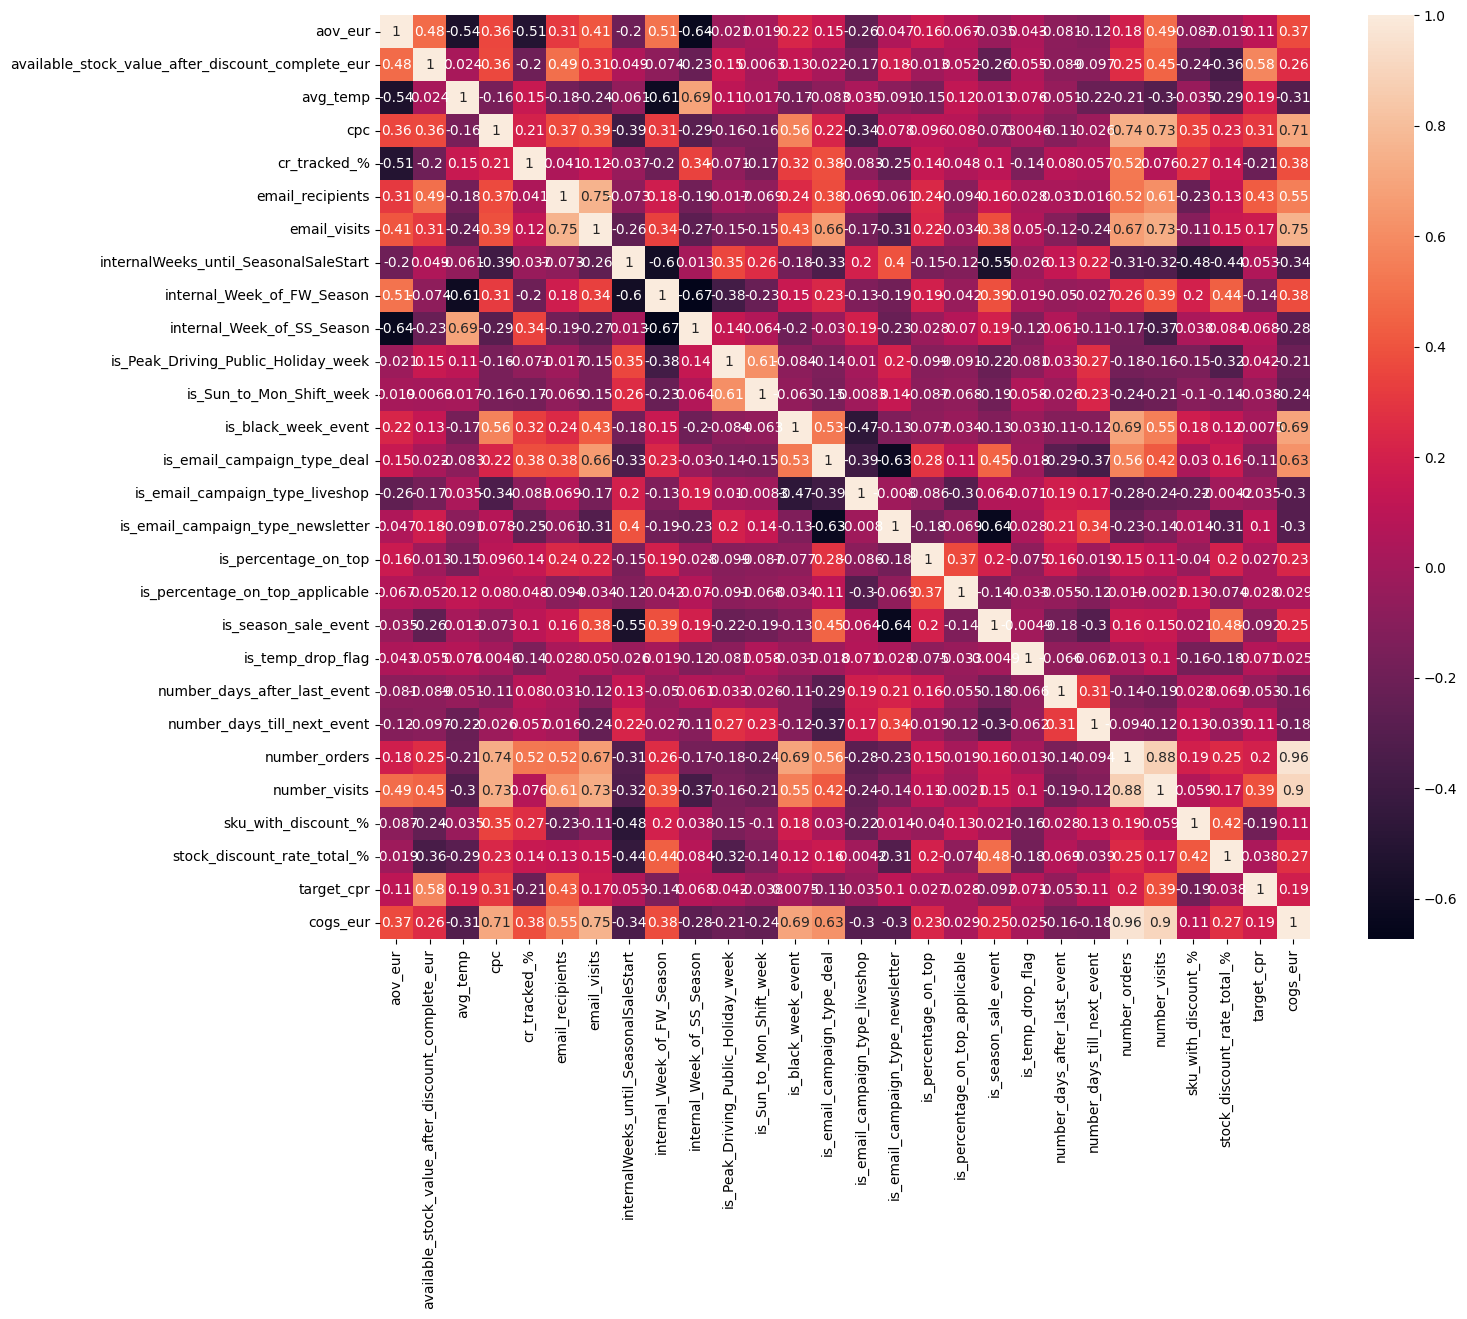

In [20]:
# correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(train_data_df.corr(), annot=True)

In [21]:
train_data_df[train_data_df['available_stock_value_after_discount_complete_eur'].isna()].index

DatetimeIndex(['2022-01-10', '2022-01-17', '2022-01-24', '2022-01-31',
               '2022-02-07', '2022-02-14', '2022-02-21', '2022-02-28',
               '2022-03-07'],
              dtype='datetime64[ns]', freq=None)

In [22]:
train_data_df[train_data_df['stock_discount_rate_total_%'].isna()].index

DatetimeIndex(['2022-01-10', '2022-01-17', '2022-01-24', '2022-01-31',
               '2022-02-07', '2022-02-14', '2022-02-21', '2022-02-28',
               '2022-03-07'],
              dtype='datetime64[ns]', freq=None)

In [23]:
print('Before droping the NaN', train_data_df.shape)
# drop all the rows with missing values
train_data_df.dropna(inplace=True)
print('After droping the NaN', train_data_df.shape)

Before droping the NaN (182, 28)
After droping the NaN (173, 28)


/var/folders/r7/zmlxrmk51wj_bl94p6kmlttw0000gn/T/ipykernel_28649/2011798991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_df.dropna(inplace=True)


In [24]:
train_data_df.to_csv('Data_for_taining_18072025.csv')